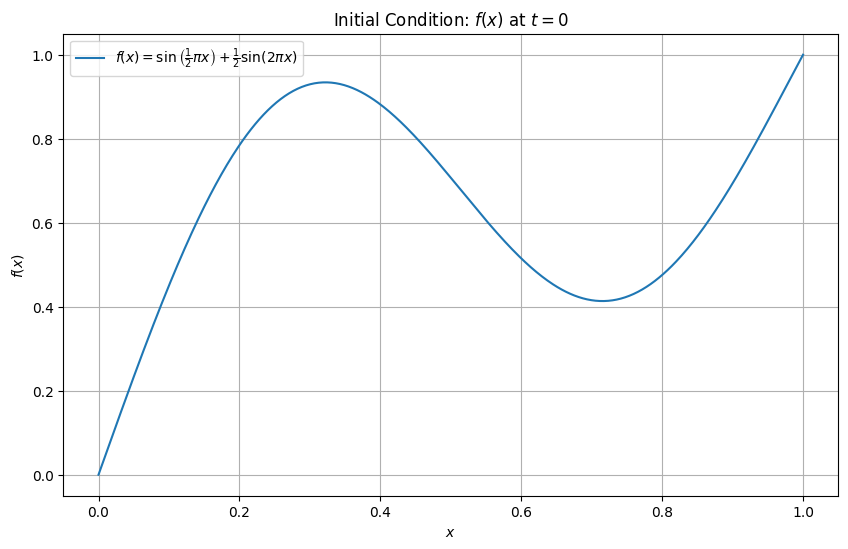

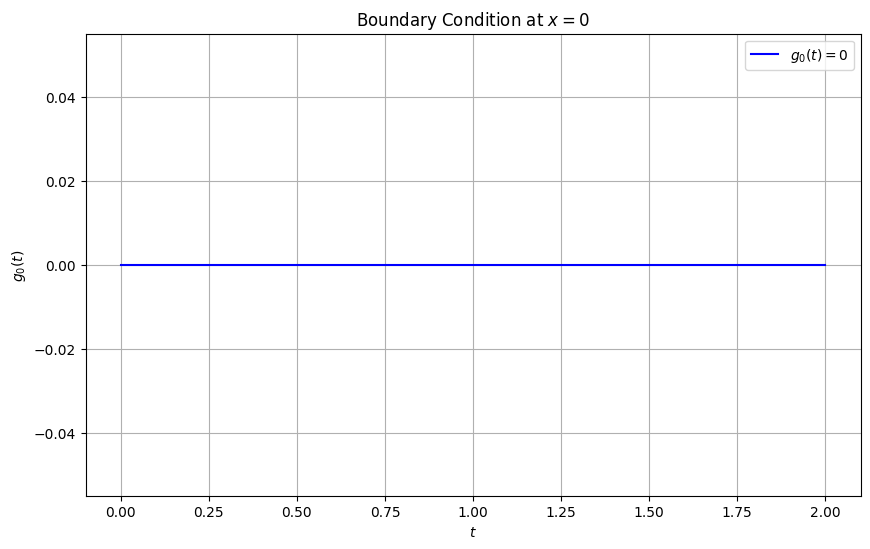

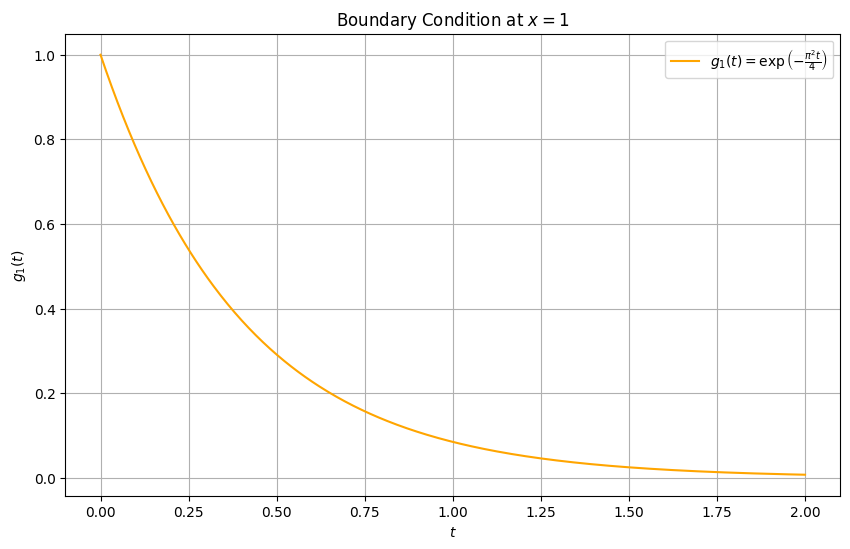

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the spatial and temporal domains
x = np.linspace(0, 1, 500)
t = np.linspace(0, 2, 500)

# Initial condition f(x) = sin(1/2 * pi * x) + (1/2) * sin(2 * pi * x)
f_x = np.sin(0.5 * np.pi * x) + 0.5 * np.sin(2 * np.pi * x)

# Boundary conditions
g_0_t = np.zeros_like(t)  # g_0(t) = 0 for all t
g_1_t = np.exp(-np.pi**2 * t / 4)  # g_1(t) = exp(-pi^2 * t / 4)

# Plot the initial condition
plt.figure(figsize=(10, 6))
plt.plot(x, f_x, label=r"$f(x) = \sin\left(\frac{1}{2} \pi x\right) + \frac{1}{2} \sin(2 \pi x)$")
plt.title("Initial Condition: $f(x)$ at $t = 0$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.grid()
plt.legend()
plt.show()

# Plot the boundary condition at x = 0 (g_0_t)
plt.figure(figsize=(10, 6))
plt.plot(t, g_0_t, label=r"$g_0(t) = 0$", color='blue')
plt.title("Boundary Condition at $x = 0$")
plt.xlabel("$t$")
plt.ylabel("$g_0(t)$")
plt.grid()
plt.legend()
plt.show()

# Plot the boundary condition at x = 1 (g_1_t)
plt.figure(figsize=(10, 6))
plt.plot(t, g_1_t, label=r"$g_1(t) = \exp\left(-\frac{\pi^2 t}{4}\right)$", color='orange')
plt.title("Boundary Condition at $x = 1$")
plt.xlabel("$t$")
plt.ylabel("$g_1(t)$")
plt.grid()
plt.legend()
plt.show()


In [ ]:
h=.25
k=.5
x=np.arange(0,1+h,h).round(3)
t=np.arange(0,2+k,k).round(3)
g=np.exp(-np.pi**2 * t / 4)
boundaryConditions=[0,g]
initialConditions= np.sin(0.5 * np.pi * x) + 0.5 * np.sin(2 * np.pi * x)
n=len(x)
m=len(t)
T=np.zeros((n,m))
T[0,:]=boundaryConditions[0]
T[-1,:]=boundaryConditions[1]
T[:,0]= initialConditions
T.round(3)
factor=k/(h**2)
for j in range(1,m):
  for i in range(1,n-1):
    T[i,j]+=factor*T[i-1,j-1] + (1-2*factor)*T[i,j-1] + factor * T[i+1,j-1]


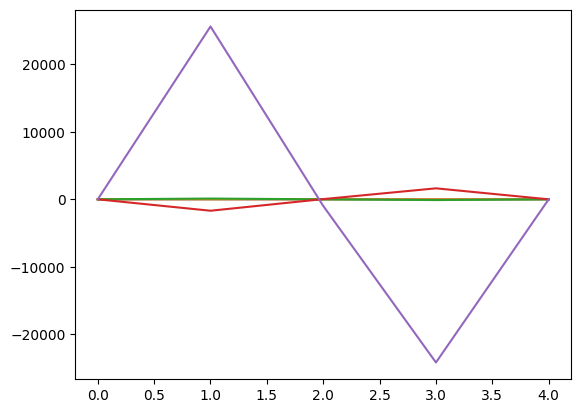

In [ ]:
plt.plot(T)

Temperature Matrix:
[[0.    0.    0.    ... 0.    0.    0.   ]
 [0.45  0.392 0.345 ... 0.001 0.001 0.001]
 [0.785 0.69  0.613 ... 0.002 0.002 0.002]
 ...
 [0.476 0.555 0.617 ... 0.007 0.007 0.007]
 [0.694 0.738 0.771 ... 0.007 0.007 0.007]
 [1.    0.988 0.976 ... 0.007 0.007 0.007]]


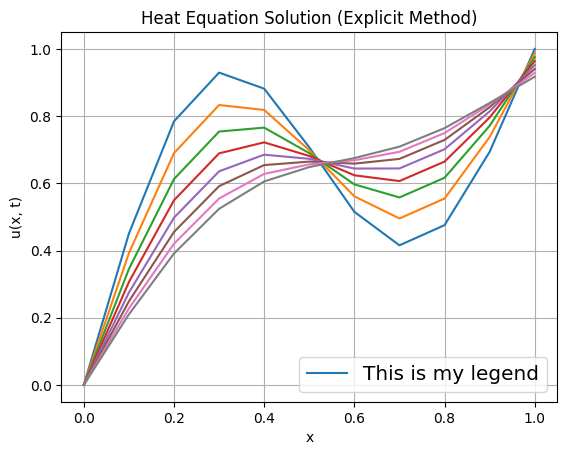

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Parameters
h = 0.1  # Smaller spatial step
k = .005  # Smaller time step
x = np.arange(0, 1 + h, h).round(3)
t = np.arange(0, 2 + k, k).round(3)
# Boundary and initial conditions
g = np.exp(-np.pi**2 * t / 4)
boundaryConditions = [0, g]
initialConditions = np.sin(0.5 * np.pi * x) + 0.5 * np.sin(2 * np.pi * x)

n = len(x)  # Number of spatial points
m = len(t)  # Number of time points

# Initialize temperature grid
T = np.zeros((n, m))
T[0, :] = boundaryConditions[0]  # Boundary condition at x = 0
T[-1, :] = boundaryConditions[1]  # Boundary condition at x = 1
T[:, 0] = initialConditions  # Initial condition at t = 0

# Stability factor
factor = k / (h**2)

# Check stability condition
if factor > 0.5:
    print("Warning: Stability condition not satisfied (factor > 0.5).")

# Time-stepping loop
for j in range(1, m):  # Iterate over time
    for i in range(1, n-1):  # Iterate over space (excluding boundaries)
        T[i, j] = (
            factor * T[i-1, j-1]
            + (1 - 2 * factor) * T[i, j-1]
            + factor * T[i+1, j-1]
        )

# Display the temperature matrix
print("Temperature Matrix:")
print(T.round(3))

# Plot results
plt.plot(x[0:11], T[0:11,0:8])
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title("Heat Equation Solution (Explicit Method)")
plt.legend()
plt.legend(loc='lower right')
plt.legend(["This is my legend"], fontsize="x-large")
plt.grid()
plt.show()


0.29121293321402086


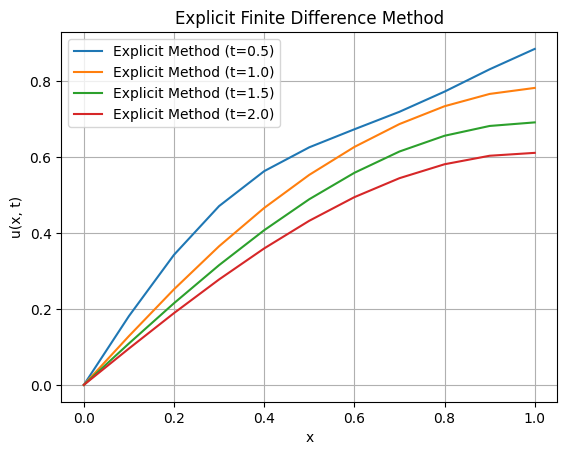

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
h = 0.1  # Spatial step size
k = 0.005  # Time step size (ensuring stability)
x = np.arange(0, 1 + h, h).round(3)  # Spatial grid
t = np.arange(0, 2 + k, k).round(3)  # Time grid

# Boundary and initial conditions
g = np.exp(-np.pi**2 * t / 4)  # Boundary condition at x = 1
boundaryConditions = [0, g]  # g[0] for x=0, g for x=1
initialConditions = np.sin(0.5 * np.pi * x) + 0.5 * np.sin(2 * np.pi * x)

n = len(x)  # Number of spatial points
m = len(t)  # Number of time points

# Initialize temperature grid
T = np.zeros((n, m))
T[0, :] = boundaryConditions[0]  # Boundary condition at x = 0
T[-1, :] = boundaryConditions[1]  # Boundary condition at x = 1
T[:, 0] = initialConditions  # Initial condition at t = 0

# Stability factor
factor = k / (h**2)

# Check stability condition
if factor > 0.5:
    print("Warning: Stability condition not satisfied. Reduce k or increase h.")

# Time-stepping loop (explicit method)
for j in range(0, m - 1):  # Iterate over time
    for i in range(1, n - 1):  # Iterate over space (excluding boundaries)
        T[i, j + 1] = (
            factor * T[i - 1, j]
            + (1 - 2 * factor) * T[i, j]
            + factor * T[i + 1, j]
        )

# Exact solution for comparison
exact_solution = lambda x, t: (
    np.exp(-np.pi**2 * t / 4) * np.sin(0.5 * np.pi * x)
    + 0.5 * np.exp(-4 * np.pi**2 * t) * np.sin(2 * np.pi * x)
)

# Plot results for specific time points
plt.title(f"Explicit Finite Difference Method")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()


plt.plot(x, T[0:11,100], label=f"Explicit Method (t={.5})")
plt.plot(x, T[0:11,200], label=f"Explicit Method (t={1.0})")
plt.plot(x, T[0:11,300], label=f"Explicit Method (t={1.5})")
plt.plot(x, T[0:11,400], label=f"Explicit Method (t={2.0})")
plt.xlabel("x")
plt.ylabel("u(x, t)")
print(T[10,100])
plt.legend()
plt.grid()
plt.show()


-0.29121293321402086


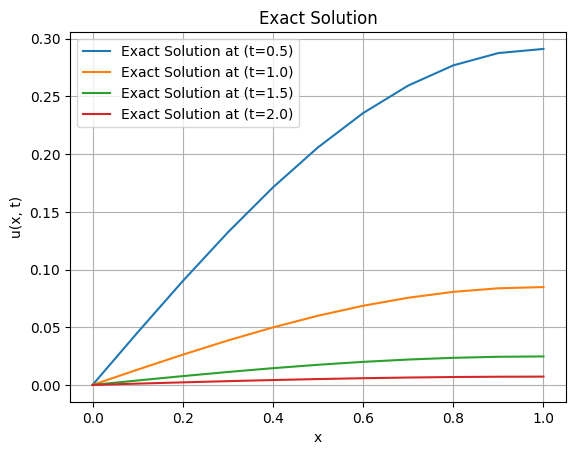

In [ ]:
exact_solution = lambda x, t: (
    np.exp(-np.pi**2 * t / 4) * np.sin(0.5 * np.pi * x)
    + 0.5 * np.exp(-4 * np.pi**2 * t) * np.sin(2 * np.pi * x)
)
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title(f"Exact Solution")
plt.grid()
print(exact_solution(11,.5))
plt.plot(x, exact_solution(x,.5),label=f"Exact Solution at (t={.5})")
plt.plot(x, exact_solution(x,1.0),label=f"Exact Solution at (t={1.0})")
plt.plot(x, exact_solution(x,1.5),label=f"Exact Solution at (t={1.5})")
plt.plot(x, exact_solution(x,2.0),label=f"Exact Solution at (t={2.0})")
plt.legend()

0.29121293321402086


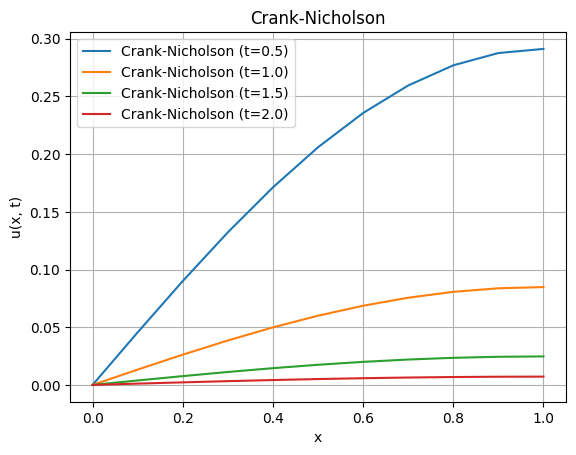

In [ ]:
#Crank-Nicholson Method
import numpy as np
import matplotlib.pyplot as plt

# Parameters
h = 0.1  # Spatial step size
k = 0.05  # Time step size
x = np.arange(0, 1 + h, h).round(10)  # Spatial grid
t = np.arange(0, 2 + k, k).round(10)  # Time grid

# Boundary and initial conditions
g = np.exp(-np.pi**2 * t / 4)  # Boundary condition at x = 1
boundaryConditions = [0, g]  # g[0] for x=0, g for x=1
initialConditions = np.sin(0.5 * np.pi * x) + 0.5 * np.sin(2 * np.pi * x)

n = len(x)  # Number of spatial points
m = len(t)  # Number of time points

# Initialize temperature grid
T = np.zeros((n, m))
T[0, :] = boundaryConditions[0]  # Boundary condition at x = 0
T[-1, :] = boundaryConditions[1]  # Boundary condition at x = 1
T[:, 0] = initialConditions  # Initial condition at t = 0

# Stability factor
lambda_ = k / (h**2)

# Construct tridiagonal matrix coefficients
a = -lambda_ / 2 * np.ones(n-2)  # Sub-diagonal
b = (1 + lambda_) * np.ones(n-2)  # Main diagonal
c = -lambda_ / 2 * np.ones(n-2)  # Super-diagonal

# Time-stepping loop (Crank-Nicholson method)
for j in range(0, m - 1):  # Iterate over time
    # Right-hand side vector
    rhs = np.zeros(n-2)
    for i in range(1, n-1):  # Iterate over internal points
        rhs[i-1] = (
            lambda_ / 2 * T[i-1, j]
            + (1 - lambda_) * T[i, j]
            + lambda_ / 2 * T[i+1, j]
        )
    # Adjust for boundary conditions
    rhs[0] += lambda_ / 2 * T[0, j+1]
    rhs[-1] += lambda_ / 2 * T[-1, j+1]

    # Solve the tridiagonal system using np.linalg.solve
    A = np.diag(a[1:], -1) + np.diag(b) + np.diag(c[:-1], 1)
    T[1:-1, j+1] = np.linalg.solve(A, rhs)

# Exact solution for comparison
exact_solution = lambda x, t: (
    np.exp(-np.pi**2 * t / 4) * np.sin(0.5 * np.pi * x)
    + 0.5 * np.exp(-4 * np.pi**2 * t) * np.sin(2 * np.pi * x)
)

# Plot results for specific time points


print(T[10,10])
plt.figure()
plt.plot(x, T[0:11, 10], label=f"Crank-Nicholson (t={.5})")
plt.plot(x, T[0:11, 20], label=f"Crank-Nicholson (t={1.0})")
plt.plot(x, T[0:11, 30], label=f"Crank-Nicholson (t={1.5})")
plt.plot(x, T[0:11, 40], label=f"Crank-Nicholson (t={2.0})")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title(f"Crank-Nicholson")
plt.legend()
plt.grid()
plt.show()
